## Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
df = pd.read_csv(r'D:\Kaggle\netflix_titles/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Important points regarding rating system

The Motion Picture Association film rating system is used in the United States and its territories to rate a motion picture's suitability for certain audiences based on its content.The MPA rating system is a voluntary scheme that is not enforced by law.
1. G – General Audiences (All ages admitted. Nothing that would   offend parents for viewing by children)
2. PG – Parental Guidance Suggested (Some material may not be suitable for children. Parents urged to give "parental guidance")
3. PG-13 – Parents Strongly Cautioned (Some material may be inappropriate for children under 13. Parents are urged to be cautious)
4. R – Restricted (Under 17 requires accompanying parent or adult guardian)
5. NC-17 – Adults Only (No One 17 and Under Admitted. Clearly adult)

## Checking for missing values

In [4]:

for col in df.columns:
    null_pct = round(df[col].isnull().sum() * 100/ len(df), 2)
    if null_pct > 0:
        print(f"{col}'s null percentage = {null_pct}%")
        

director's null percentage = 30.68%
cast's null percentage = 9.22%
country's null percentage = 6.51%
date_added's null percentage = 0.13%
rating's null percentage = 0.09%


In [5]:
# check for data type for all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# converting fetaures data type 
df['date_added'] = pd.to_datetime(df['date_added'])

In [7]:
# to check uniques values in each feature
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1512
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [8]:
df['added_year'] = df['date_added'].dt.year

In [9]:
df1 = df.groupby(['type', 'added_year'])['show_id'].count().reset_index()

df2 = df.groupby('added_year')['show_id'].count().reset_index()

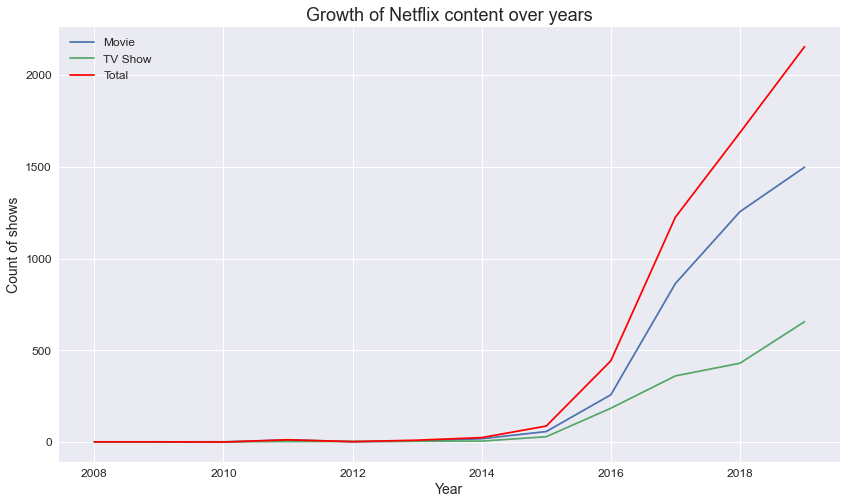

In [10]:
fig, ax = plt.subplots(1,1, figsize= (14,8))
sns.lineplot(x= 'added_year', y= 'show_id', hue= 'type', data = df1[df1['added_year']<2020], ax= ax)
   
sns.lineplot(x= 'added_year', y = 'show_id', data= df2[df2['added_year']<2020], color = 'r', ax= ax, label= 'Total')

ax.legend(fontsize = 12)
ax.set_title('Growth of Netflix content over years',fontsize= 18)
ax.set_xlabel('Year', fontsize= 14)
ax.set_ylabel('Count of shows', fontsize= 14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

Number of movies added to Netflix is much higher when compared with TV shows. The growth in content started from 2015. Netflix kept on adding different movies and tv shows on its platform over the years. Content varied from different categories and countries.

In [11]:
country = df['country'].dropna()

In [12]:
from collections import Counter
countries = pd.Series(dict(Counter(','.join(country).replace(", ", ",").replace(" ,",",").split(",")))).sort_values(ascending = False)
    

In [13]:
cont = round(countries[:20].sum()/countries.sum()*100,2)
print(f'Top 20 countries contribution for Netflix content = {cont}%')

Top 20 countries contribution for Netflix content = 86.9%


In [14]:
# Content data for top 20 countries 
top20_country = countries[:20]

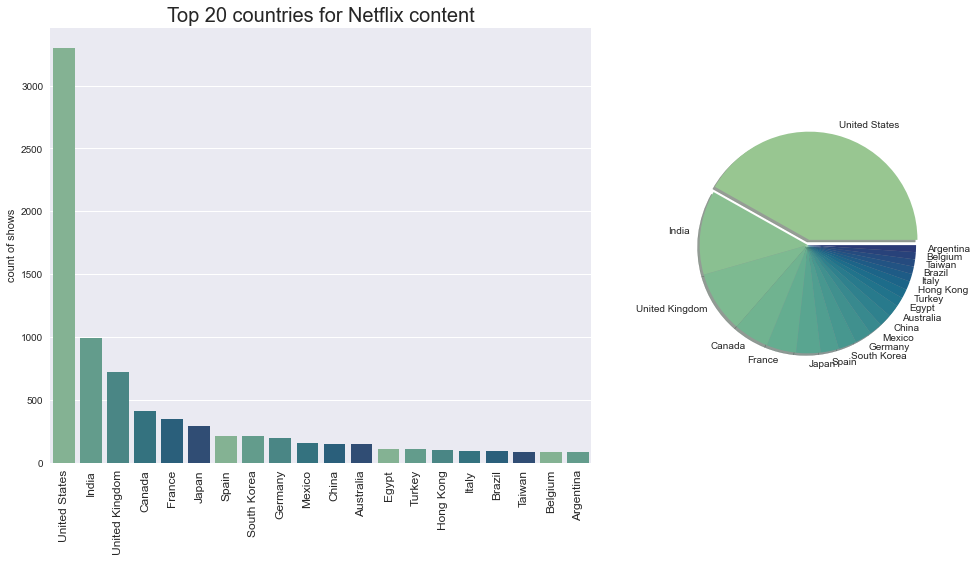

In [15]:
fig, ax = plt.subplots(1,2, figsize= (16,8), width_ratios= (2,1))

sns.barplot(top20_country.index, top20_country, ax=ax[0], palette= sns.color_palette("crest"))
ax[0].set_xticklabels(top20_country.index, rotation= 'vertical', fontsize =12)
ax[0].set_ylabel('count of shows')

explode = [0 for i in range(20) ]
explode[0] = 0.05
ax[1].pie(top20_country, labels=top20_country.index,
        shadow=True, startangle=0,explode= explode,
        colors= sns.color_palette("crest", n_colors=20)
       )
ax[0].set_title('Top 20 countries for Netflix content', fontsize=20)
plt.show()

1. As we can see almost 40% of content on netflix comes from united states 
2. Also most of the content added to Netflix comes from these top 20 countries

In [16]:
df['listed_in']

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
                              ...                        
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7785                   International TV Shows, Reality TV
7786                      Documentaries, Music & Musicals
Name: listed_in, Length: 7787, dtype: object

In [17]:
df_movie = df[df['type'] == 'Movie']
df_tv = df[df['type'] == 'TV Show']

In [18]:
movie_genre = pd.Series(dict(Counter(','.join(df_movie['listed_in']).replace(", ", ",").replace(" ,", ",").split(",")))).sort_values(ascending= False)

In [19]:
tv_genre = pd.Series(dict(Counter(','.join(df_tv['listed_in']).replace(", ", ",").replace(" ,", ",").split(",")))).sort_values(ascending= False)

In [20]:
movie_genre

International Movies        2437
Dramas                      2106
Comedies                    1471
Documentaries                786
Action & Adventure           721
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Thrillers                    491
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
Sci-Fi & Fantasy             218
Sports Movies                196
Classic Movies               103
LGBTQ Movies                  90
Cult Movies                   59
Faith & Spirituality          57
Anime Features                57
Movies                        56
dtype: int64

In [21]:
movie_genre.index
movie_genre.values

array([2437, 2106, 1471,  786,  721,  673,  532,  531,  491,  329,  321,
        312,  218,  196,  103,   90,   59,   57,   57,   56], dtype=int64)

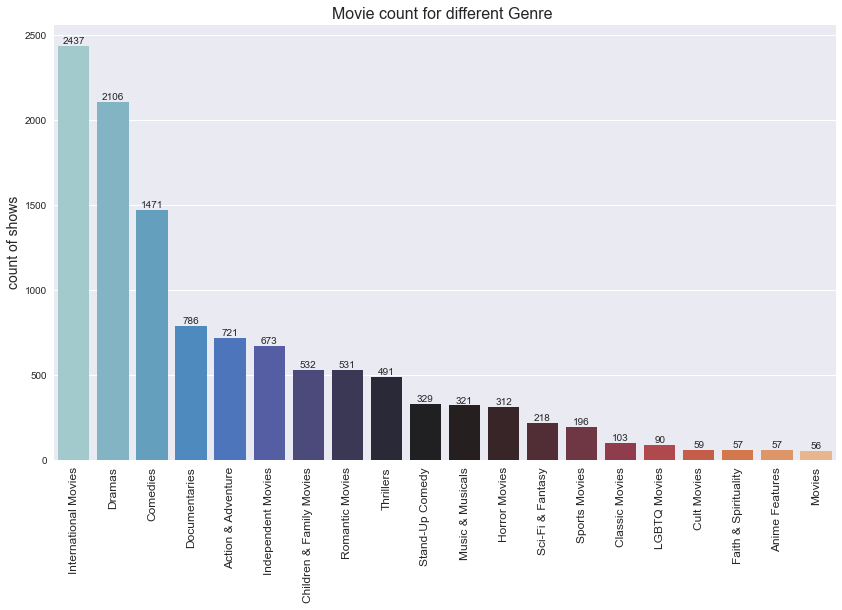

In [22]:
fig, ax = plt.subplots(figsize= (14,8))
sns.barplot(x = movie_genre.index, y= movie_genre.values, ax=ax, palette= sns.color_palette("icefire", n_colors= 20))
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(movie_genre.index, rotation= 90, fontsize =12)
ax.set_ylabel('count of shows', fontsize= 14)
ax.set_title("Movie count for different Genre ", fontsize = 16)
plt.show()

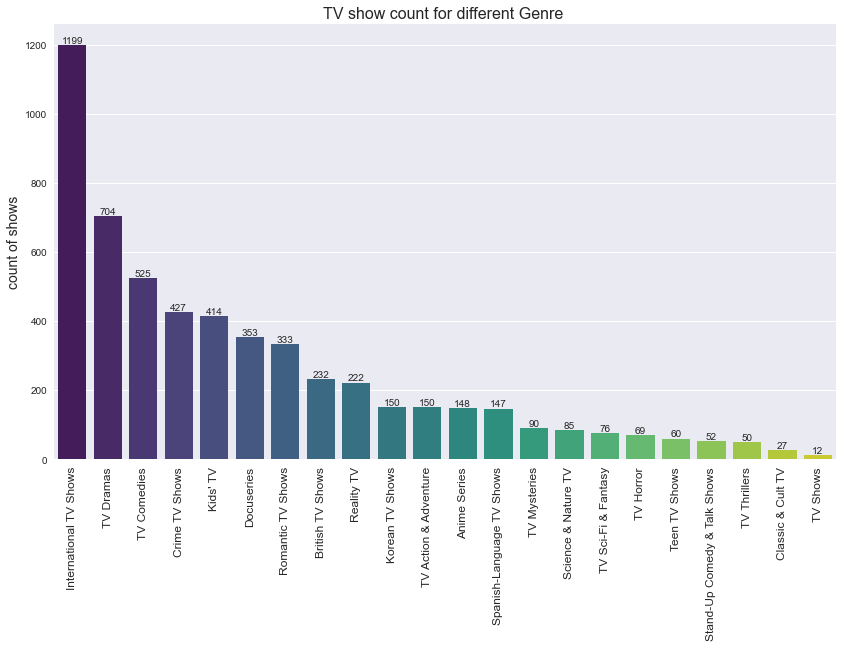

In [23]:
fig, ax = plt.subplots(figsize= (14,8))
sns.barplot(x = tv_genre.index, y= tv_genre.values, ax=ax, palette= sns.color_palette("viridis", n_colors=22))
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(tv_genre.index, rotation= 90, fontsize =12)
ax.set_ylabel('count of shows', fontsize= 14)
ax.set_title("TV show count for different Genre ", fontsize = 16)
plt.show()

In case of both TV shows and movies popular genre are international content then followed by drama and comedy

In [41]:
cast = tv_genre = pd.Series(dict(Counter(','.join(df['cast'].dropna()).replace(", ", ",").replace(" ,", ",").split(",")))).sort_values(ascending= False)

In [43]:
len(cast)

32881

In [56]:
# Top 10 actors with most number of movies or tv shows
top_10_cast = cast[:10]

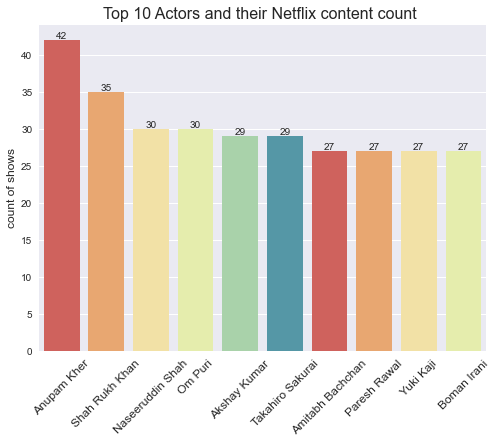

In [66]:
fig, ax = plt.subplots(figsize= (8,6))
sns.barplot(x = top_10_cast.index, y= top_10_cast.values, ax=ax, palette= sns.color_palette("Spectral"))
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticklabels(top_10_cast.index, rotation= 45, fontsize =12)
ax.set_ylabel('count of shows', fontsize= 12)
ax.set_title("Top 10 Actors and their Netflix content count ", fontsize = 16)
plt.show()

Out of top 10 actors with most netflix content, 9 of them are from India.